In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import os
import nltk
import re

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load data
df = pd.read_csv('buku.csv', encoding='ISO-8859-1', sep='delimiter', engine='python')
df.head(30)

,judul;
0,Keanggotaan Investasi Reseller Bukukita;
1,Keanggotaan Investasi Dropship Bukukita;
2,Komik Dari Twit-nya Raditya Dika;
3,Rangkuman Tips Beriklan Selama 9 Tahun;
4,PROPERTI KOMODO ;
5,Panduan Menulis Siswa Tingkat Dasar;
6,Buku Saku Kumpulan Rumus Matematika SMA IPA;
7,Cahaya Di Penjuru HATI;
8,Catatan Ayahasi Ditambah-tambahin;
9,Al-Akram;


In [ ]:
print("Number of records: ", df.shape[0])

Number of records:  5618


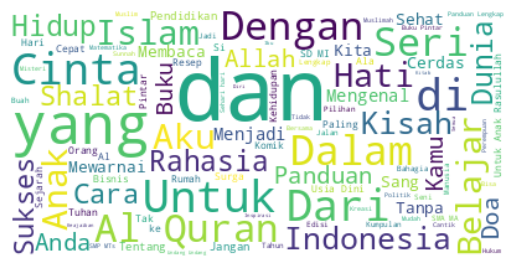

In [ ]:
# Menggabungkan semua teks dari kolom yang ingin digunakan dalam satu string
text = ' '.join(df['judul;'])

# Membuat wordcloud dengan maksimal 100 kata dan warna background putih
wordcloud = WordCloud(max_words=100, background_color="white").generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Mengubah ke huruf kecil
df['judul;'] = df['judul;'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['judul;'].head()

0    keanggotaan investasi reseller bukukita;
1    keanggotaan investasi dropship bukukita;
2           komik dari twit-nya raditya dika;
3     rangkuman tips beriklan selama 9 tahun;
4                           properti komodo ;
Name: judul;, dtype: object

In [ ]:
# Menghapus tanda baca
df['judul;'] = df['judul;'].apply(lambda x:re.sub('[!@#$:).;,?&]', "", x.lower()))
df['judul;'].head()

0    keanggotaan investasi reseller bukukita
1    keanggotaan investasi dropship bukukita
2           komik dari twit-nya raditya dika
3     rangkuman tips beriklan selama 9 tahun
4                           properti komodo 
Name: judul;, dtype: object

In [ ]:
# Proses tokenisasi
tokenizer = Tokenizer(oov_token=None)
tokenizer.fit_on_texts(df['judul;'])
total_words = len(tokenizer.word_index) + 1

print("Total number of words: ", total_words)

Total number of words:  6887


In [ ]:
# Melihat tokenisasi dari setiap kata
tokenizer.word_index

{'dan': 1,
 'yang': 2,
 'di': 3,
 'untuk': 4,
 'seri': 5,
 'anak': 6,
 'al': 7,
 'aku': 8,
 'dari': 9,
 'islam': 10,
 'buku': 11,
 'cinta': 12,
 'dalam': 13,
 'dengan': 14,
 'quran': 15,
 'belajar': 16,
 'indonesia': 17,
 'kisah': 18,
 '2': 19,
 '1': 20,
 'panduan': 21,
 'pintar': 22,
 'dunia': 23,
 'sukses': 24,
 'doa': 25,
 'hati': 26,
 'cara': 27,
 'orang': 28,
 'hidup': 29,
 'rahasia': 30,
 'mengenal': 31,
 'bahasa': 32,
 'allah': 33,
 'lengkap': 34,
 'shalat': 35,
 'rumah': 36,
 'menjadi': 37,
 'hari': 38,
 'pendidikan': 39,
 'anda': 40,
 '3': 41,
 'kelas': 42,
 'menulis': 43,
 'nabi': 44,
 'sd': 45,
 'paling': 46,
 'membaca': 47,
 'mewarnai': 48,
 'cerita': 49,
 'soal': 50,
 'kumpulan': 51,
 'jilid': 52,
 'sma': 53,
 'tanpa': 54,
 'undang': 55,
 'edisi': 56,
 'sang': 57,
 'tk': 58,
 'muslim': 59,
 'sehat': 60,
 'praktis': 61,
 'jangan': 62,
 'tak': 63,
 'komik': 64,
 'ensiklopedia': 65,
 'cerdas': 66,
 'kita': 67,
 'masa': 68,
 'itu': 69,
 'cepat': 70,
 'bisa': 71,
 'tentang': 72

In [ ]:
# Proses n-gram (sequencing)
input_sequences = []
for line in df['judul;']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)

    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  25389


In [ ]:
# Melihat hasil ngram dari setiap kata
input_sequences

[[2001, 581],
 [2001, 581, 3025],
 [2001, 581, 3025, 2002],
 [2001, 581],
 [2001, 581, 3026],
 [2001, 581, 3026, 2002],
 [64, 9],
 [64, 9, 3027],
 [64, 9, 3027, 1208],
 [64, 9, 3027, 1208, 3028],
 [64, 9, 3027, 1208, 3028, 3029],
 [725, 280],
 [725, 280, 3030],
 [725, 280, 3030, 1520],
 [725, 280, 3030, 1520, 264],
 [725, 280, 3030, 1520, 264, 110],
 [2003, 1521],
 [21, 43],
 [21, 43, 2004],
 [21, 43, 2004, 842],
 [21, 43, 2004, 842, 97],
 [11, 1209],
 [11, 1209, 51],
 [11, 1209, 51, 217],
 [11, 1209, 51, 217, 102],
 [11, 1209, 51, 217, 102, 53],
 [11, 1209, 51, 217, 102, 53, 172],
 [372, 3],
 [372, 3, 3031],
 [372, 3, 3031, 26],
 [218, 3032],
 [218, 3032, 3033],
 [218, 3032, 3033, 3034],
 [7, 2005],
 [11, 21],
 [11, 21, 1210],
 [11, 21, 1210, 23],
 [11, 21, 1210, 23, 3035],
 [11, 21, 1210, 23, 3035, 521],
 [726, 2006],
 [726, 2006, 726],
 [726, 2006, 726, 986],
 [726, 2006, 726, 986, 26],
 [3036, 187],
 [3036, 187, 1211],
 [3036, 187, 1211, 1212],
 [3036, 187, 1211, 1212, 3037],
 [303

In [ ]:
# Proses padding
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 2001,  581, 3025], dtype=int32)

In [ ]:
# Menyimpan proses tokenisasi untuk fungsi prediksi
pickle.dump(tokenizer, open('token6pre13.pkl', 'wb'))

# Menyimpan proses padding untuk fungsi prediksi
pickle.dump(max_sequence_len, open('padding6pre13.pkl', 'wb'))

In [ ]:
# Membuat data features dan label
x, labels = input_sequences[:,:-1],input_sequences[:,-1]
y = to_categorical(labels, num_classes=total_words)

In [ ]:
print(x[5])
print(labels[5])
print(y[5][14])

[   0    0    0    0    0    0    0    0    0    0    0    0    0 2001
  581 3026]
2002
0.0


In [ ]:
# Pemodelan data
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(1000)))
model.add(Dense(total_words, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 16, 10)            68870     
                                                                 
 bidirectional_1 (Bidirectio  (None, 2000)             8088000   
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6887)              13780887  
                                                                 
Total params: 21,937,757
Trainable params: 21,937,757
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Untuk melakukan penghentian otomatis pelatihan
from keras.callbacks import TensorBoard, EarlyStopping
callback = EarlyStopping(monitor = 'loss', patience = 1, mode = 'min', restore_best_weights = True)

In [ ]:
# Pelatihan
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=[tf.keras.metrics.Recall(), 'accuracy',
                       tf.keras.metrics.Precision()])
history = model.fit(x, y, epochs=200, verbose=1)
print(model)

Epoch 1/200
794/794 [==============================] - 29s 31ms/step - loss: 7.8373 - recall_1: 0.0000e+00 - accuracy: 0.0413 - precision_1: 0.0000e+00
Epoch 2/200
794/794 [==============================] - 18s 22ms/step - loss: 7.3743 - recall_1: 0.0000e+00 - accuracy: 0.0421 - precision_1: 0.0000e+00
Epoch 3/200
794/794 [==============================] - 17s 22ms/step - loss: 7.0249 - recall_1: 7.0897e-04 - accuracy: 0.0495 - precision_1: 0.4390
Epoch 4/200
794/794 [==============================] - 17s 22ms/step - loss: 6.4470 - recall_1: 0.0063 - accuracy: 0.0711 - precision_1: 0.6250
Epoch 5/200
794/794 [==============================] - 18s 22ms/step - loss: 5.7172 - recall_1: 0.0200 - accuracy: 0.1006 - precision_1: 0.6889
Epoch 6/200
794/794 [==============================] - 18s 22ms/step - loss: 4.8982 - recall_1: 0.0442 - accuracy: 0.1458 - precision_1: 0.6637
Epoch 7/200
794/794 [==============================] - 17s 22ms/step - loss: 4.0846 - recall_1: 0.0878 - accuracy: 0

In [ ]:
# Membuat fungsi untuk menampilkan plot hasil akurasi
import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt
def draw_plot(data, type_data):
  mpl.style.use('seaborn')
  plt.figure(figsize = (20, 5))
  plt.plot(data,'darkblue', label='Train')
  plt.xlabel('Epoch')
  plt.ylabel(type_data)
  plt.legend()

<ipython-input-35-2b7cc196a670>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


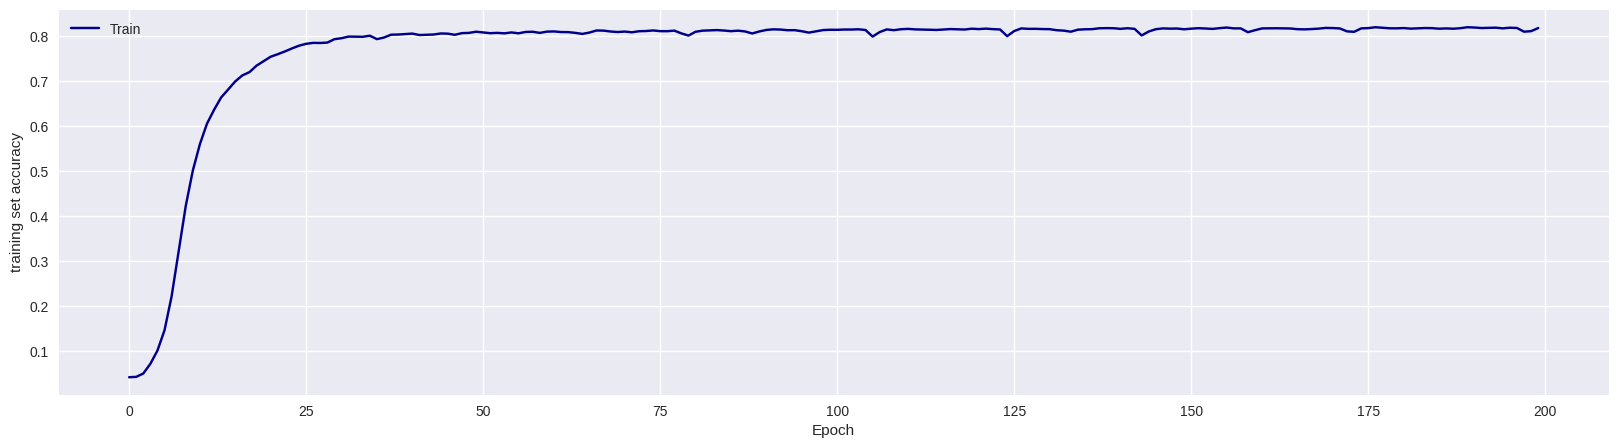

In [ ]:
# Menampilkan plot akurasi
draw_plot(history.history['accuracy'],'training set accuracy' )

<ipython-input-35-2b7cc196a670>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


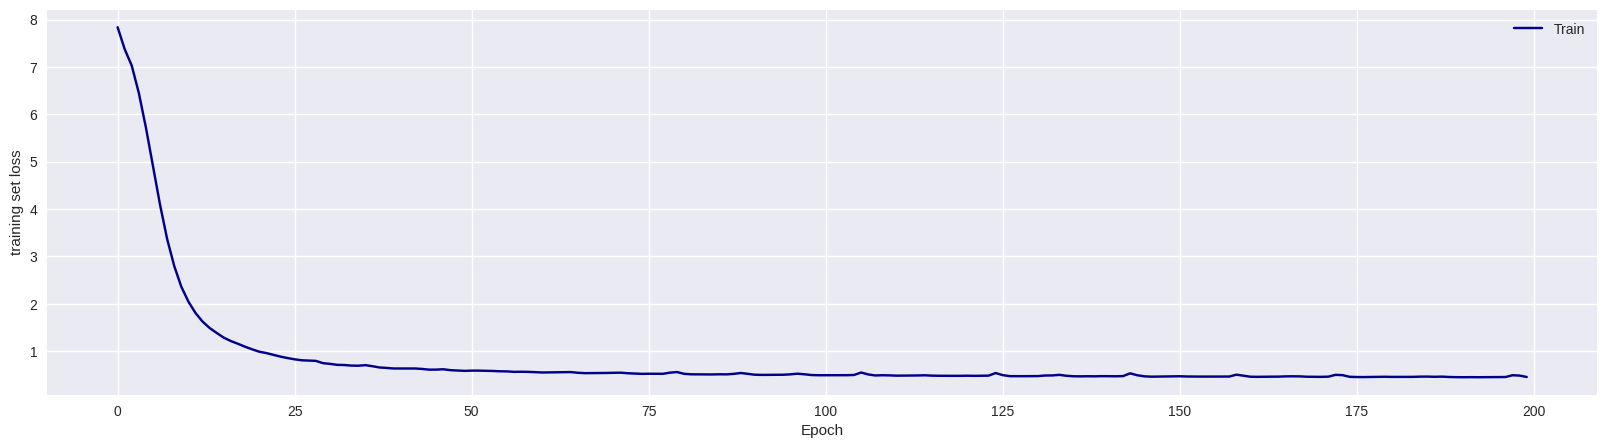

In [ ]:
# Menampilkan plot loss
draw_plot(history.history['loss'],'training set loss' )

In [ ]:
# Menyimpan model
model.save('model6pre13.h5', history)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pickle

# load the model
model = load_model('model6pre13.h5')

# load the tokenizer
tokenizer = pickle.load(open('token6pre13.pkl', 'rb'))

# load the tokenizer
max_sequence_len = pickle.load(open('padding6pre13.pkl', 'rb'))

while(True):
    seed_text = input("Enter your line: ")

    if seed_text == "end":
        print("Execution completed.....")
        break

    else:
        try:
            next_words = 4

            for _ in range(next_words):
                token_list = tokenizer.texts_to_sequences([seed_text])[0]
                token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
                predicted = np.argmax(model.predict(token_list))
                output_word = ""
                for word, index in tokenizer.word_index.items():
                    if index == predicted:
                        output_word = word
                        break
                seed_text += " " + output_word
            print(seed_text)

        except Exception as e:
            print("Error occurred: ",e)
            continue

Enter your line: buku
1/1 [==============================] - 0s 21ms/step
buku pintar anak islam asmaul
Enter your line: nasihat
1/1 [==============================] - 0s 17ms/step
nasihat langit penentram jiwa 4
Enter your line: panduan
1/1 [==============================] - 0s 19ms/step
panduan lengkap dan praktis budidaya
Enter your line: end
Execution completed.....
